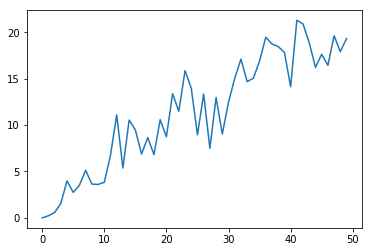

In [14]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline

#function that simulates random diffusion box with hole and returns average value of particles in the hole
def diffusion(N,Ngrid,max,Hole):
    #conditional function for hole in box
    def hole(i,positionx,positiony,grid,move,count):
        if(positionx[i] == -(grid) and positiony[i] >= -(grid*0.2) and positiony[i] <= (grid*0.2)):
            return 0
        else:
            return move
    #initial conditions
    Run = True
    a = 0
    position_x = np.zeros(N)
    position_y = np.zeros(N)
    Harray = np.array([0])
    #loop for number of times particles move (also time incrament)
    while(Run == True):
        Hcount = 0
        #loop that moves the individual particles
        for i in range(N):
            #determines random move
            move = random.choice([-1,1])
            axis = random.choice([0,1])

            #checks to see if there is a hole in the box
            if(Hole==True):
                move = hole(i,position_x,position_y,Ngrid,move,Hcount)
                if(move == 0):
                    Hcount += 1

            #updates position and checks to see if particle is on the edge   
            if((position_x[i]+move) > Ngrid):
                move = 0
            elif((position_x[i]+move) < -(Ngrid)):
                move = 0
            elif(axis == 0):
                position_x[i] += move
            elif((position_y[i]+move) > Ngrid):
                move = 0
            elif((position_y[i]+move) < -(Ngrid)):
                move = 0
            else:
                position_y[i] += move
        #updates movement counter
        a += 1
        Harray = np.append(Harray,Hcount)
        #movement counter
        if(a >= max):
            Run = False
    #plots each individual random distribution (for checking errors)
    #plt.figure()
    #plt.plot(position_x,position_y,'.')
    
    #computes average # of paricles in the hole
    val1 = np.sum(Harray)
    val2 = len(Harray)
    val = val1/val2
    return val
#array of average values
Average_array = np.zeros(50)
#change the array values to the average value 
for i in range(50):
    N = 50
    Ngrid = 20
    AverageTime = (i+1)*100
    Hole = True
    Average_array[i] = diffusion(N,Ngrid,AverageTime,Hole)
    
    
#plots number of particles in the hole vs time "# of movements"

plt.figure()
plt.plot(Average_array)
  